In [96]:
from yolo.data import CollateWithAnchors, CocoDataset, get_val_transforms
from yolo.visualize import render_bounding_boxes, plot
import itertools
from PIL import Image

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
IMAGE_SIZE = 608
ANCHORS = [
    (10,13),
    (16,30),
    (33,23),
    (30,61),
    (62,45),
    (59,119),
    (116,90),
    (156,198),
    (373,326)
]
SCALES = [8, 16, 32]

val_dataset = CocoDataset(
    dataset_root = "/media/bryan/ssd01/fiftyone/coco-2017",
    split = "validation",
    transform = get_val_transforms(resize_size=IMAGE_SIZE)
)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=10,
    shuffle=False,
    pin_memory=True,
    drop_last=False,
    num_workers=0,
    collate_fn=CollateWithAnchors(ANCHORS, SCALES, IMAGE_SIZE, IMAGE_SIZE, num_classes = val_dataset.num_classes())
)

loading annotations into memory...
Done (t=0.16s)
creating index...
index created!


In [99]:
batch = next(iter(val_dataloader))

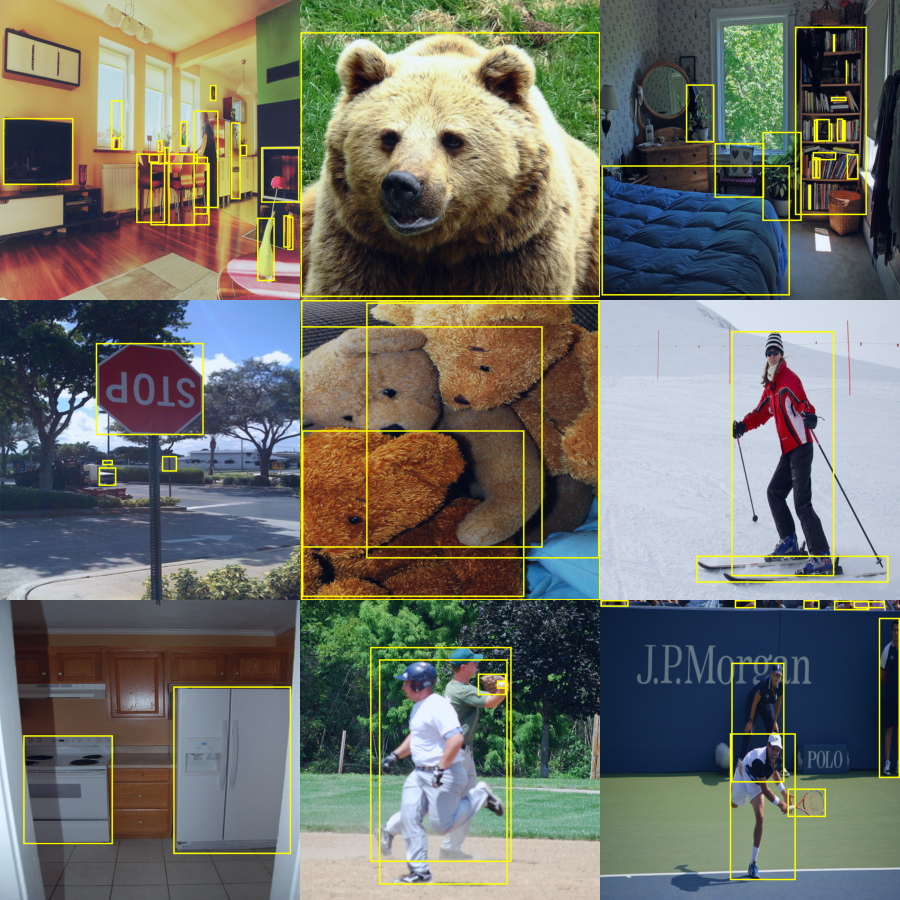

In [100]:
def flatten_batch(batch):
    keys = [k for k in batch.keys() if k != "image"]
    images = batch["image"]
    flat = []
    for i in range(len(images)):
        flat.append((images[i], {key: batch[key][i] for key in keys}))
    return flat

batch_flat = flatten_batch(batch)[:9]
batch_flat_reshape = [list(x) for x in itertools.batched(batch_flat, 3)]
vis = plot(batch_flat_reshape)
Image.fromarray(vis)